## 1. Data wrangling

This notebook contains the steps 3-5 to prepare the dataset for the modelling process:
1. Data collection 
2. Analysis and profiling
3. Quality check assesment
4. Data cleaning
5. Variable optimization

Fistly, I will import the necessary packages

In [1]:
# Import the required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

---
### 1.3. Quality check assesment

This step involves checking for missing or inconsistent values within the variables. A visual inspection is used in the cell below to check for links  

In [2]:
# Import pre-processed dataset and load it into a dataframe

file = 'C:/Users/javie/OneDrive/Documents/springboard_projects/Capstone-2/data/interim/pre-selected.csv'

df = pd.read_csv(file, index_col=0)

In [3]:
df.shape

(5686, 36)

In [4]:
# Print sample

df.head()

,ATTIC,ATTICFIN,BASEFIN,BEDROOMS,CDD30YR,CDD65,CELLAR,COOLTYPE,DOLELCOL,DOLLAREL,...,STORIES,SWIMPOOL,TOTALDOLSPH,TOTSQFT_EN,TOTROOMS,TYPEHUQ,WALLTYPE,YEARMADERANGE,DOLELLGT,TOTALDOLWTH
0,0.0,NaN,NaN,3,1332.0,1768.0,0.0,Central AC,365.46,967.23,...,2,0.0,176.59,1808.0,7,Detached house,Stucco,2000-2009,75.18,248.33
1,0.0,NaN,NaN,2,2494.0,2795.0,0.0,Individual units,249.54,1366.00,...,1,0.0,380.52,759.0,4,Detached house,Siding,1980-1989,124.51,234.49
2,0.0,NaN,1.0,4,2059.0,2235.0,1.0,Both central and individual,844.63,2428.08,...,1,0.0,601.17,2288.0,9,Detached house,Wood,1970-1979,113.33,250.71
3,0.0,NaN,1.0,3,1327.0,1374.0,1.0,Central AC,471.13,1313.12,...,1,0.0,863.46,2573.0,7,Detached house,Siding,1950-1959,64.58,114.62
4,1.0,0.0,0.0,3,871.0,993.0,1.0,Central AC,62.05,581.07,...,2,0.0,67.87,1024.0,6,Detached house,Brick,1970-1979,112.65,220.26


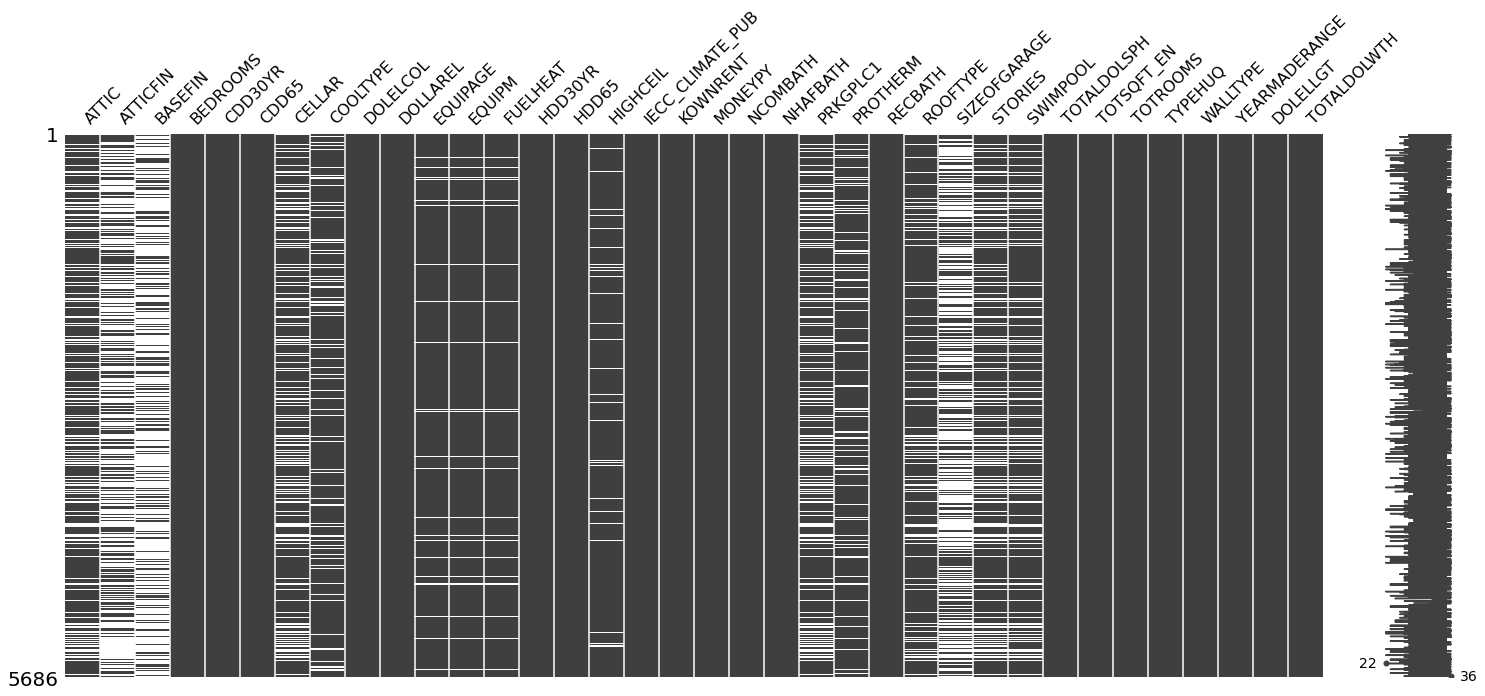

In [5]:
# Visualize missigness density and distribution

m = msno.matrix(df)
plt.show()

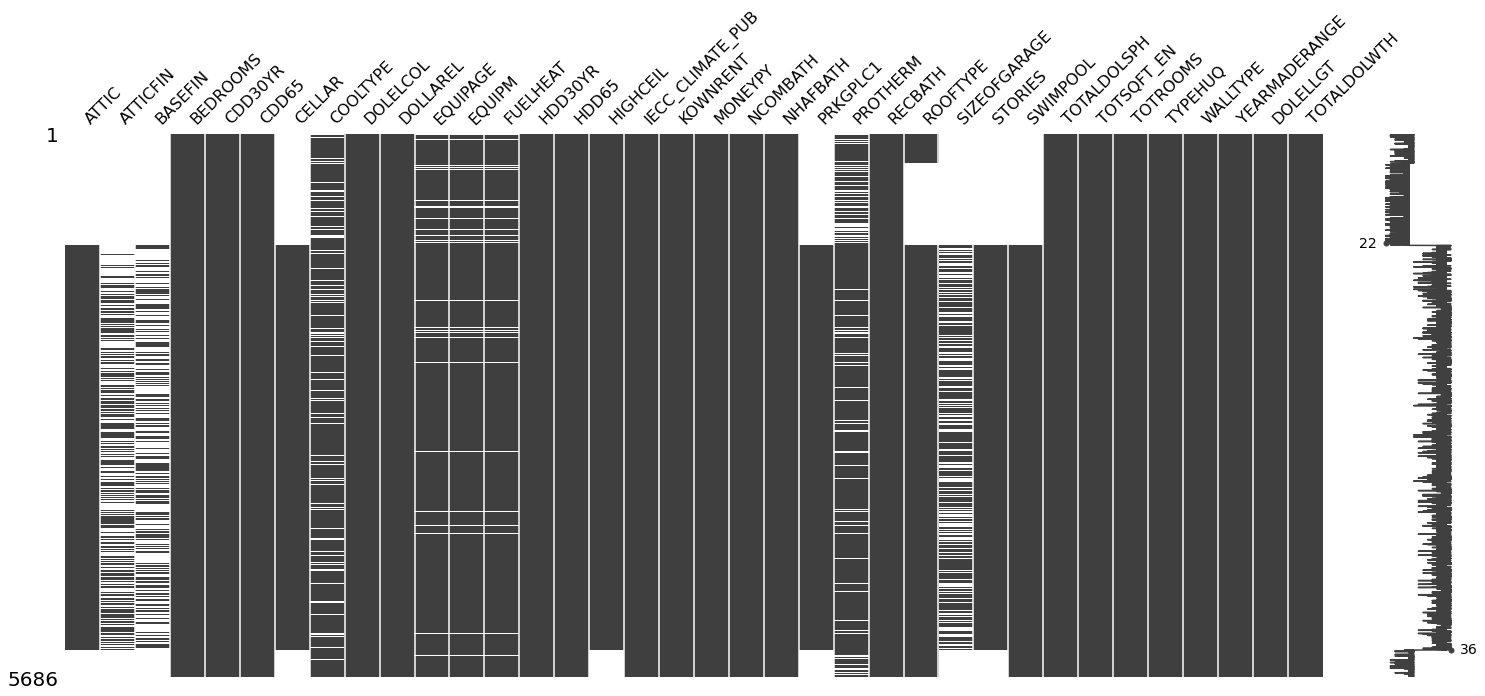

In [6]:
# Visualize missigness density and distribution by type of residential unit

df_byTYPEHUQ = df.sort_values(by='TYPEHUQ')

m = msno.matrix(df_byTYPEHUQ)
plt.show()

---

In this section, two variables containing cooling degree days (CDD) in 2015 and a 30 years CDD average are collated to analyze how far 2015 deviates from the average, and later adjust the response variable result accordingly. Cumulative distribution functions for both variables are plotted for comparison below.

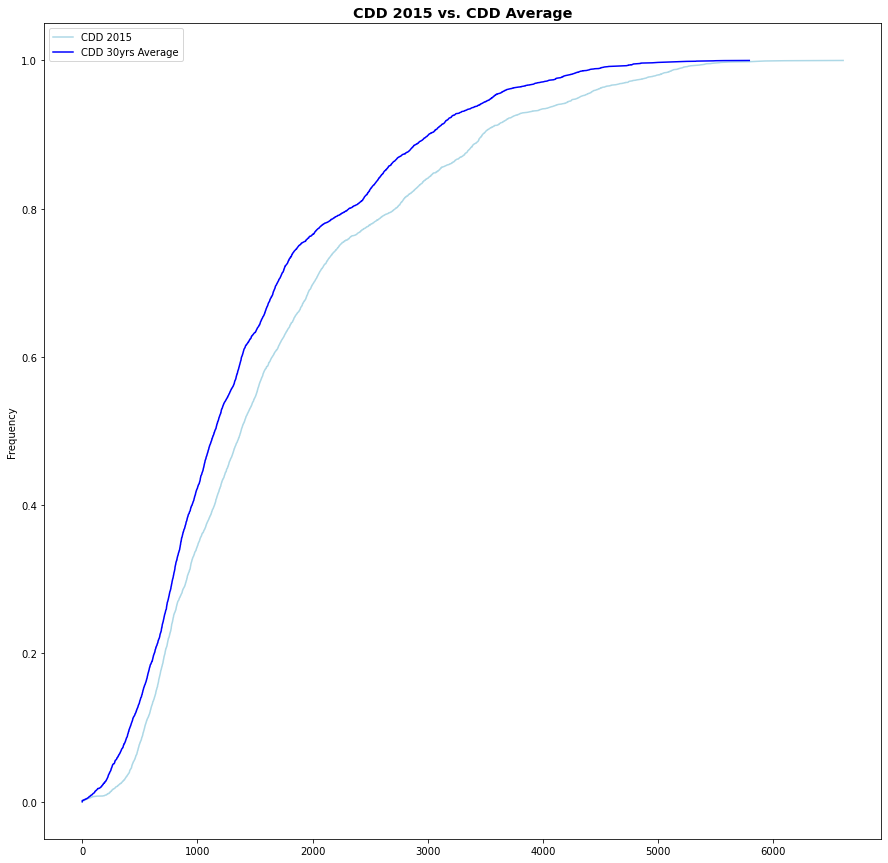

In [7]:
# Creates the figure
fig = plt.figure(figsize=(15,15), dpi=72)

# Creates CDF values
cdf1 = 1. * np.arange(len(df['CDD65'])) / (len(df['CDD65']) - 1)
cdf2 = 1. * np.arange(len(df['CDD30YR'])) / (len(df['CDD30YR']) - 1)

# Plots function
plt.plot(df['CDD65'].sort_values(), cdf1, color='lightblue')
plt.plot(df['CDD30YR'].sort_values(), cdf2, color='blue')
    
# Adjusts appearance
plt.ylabel('Frequency')
plt.title('CDD 2015 vs. CDD Average', fontsize='x-large', fontweight='bold')
plt.legend(['CDD 2015', 'CDD 30yrs Average'])

plt.show()

In [8]:
# Calculates cooling degree days mean difference in % 

prct_diff_CDD = round(((df['CDD30YR'].mean()-df['CDD65'].mean())*100 / df['CDD30YR'].mean()), 2)

prct_diff_CDD

-18.51

Same process for Heating Degree Days (HDD)

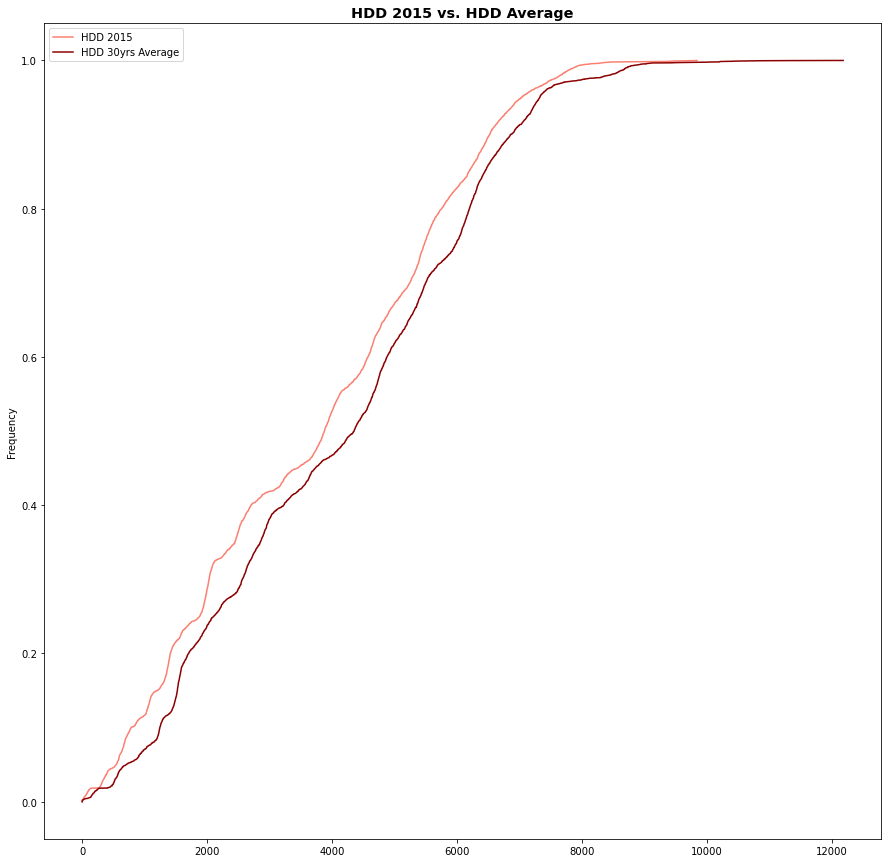

In [9]:
# Creates the figure
fig = plt.figure(figsize=(15,15), dpi=72)

# Creates CDF values
cdf3 = 1. * np.arange(len(df['HDD65'])) / (len(df['HDD65']) - 1)
cdf4 = 1. * np.arange(len(df['HDD30YR'])) / (len(df['HDD30YR']) - 1)

# Plots function
plt.plot(df['HDD65'].sort_values(), cdf3, color='salmon')
plt.plot(df['HDD30YR'].sort_values(), cdf4, color='darkred')
    
# Adjusts appearance
plt.ylabel('Frequency')
plt.title('HDD 2015 vs. HDD Average', fontsize='x-large', fontweight='bold')
plt.legend(['HDD 2015', 'HDD 30yrs Average'])

plt.show()

In [10]:
# Calculates heating degree days mean difference in % 

prct_diff_HDD = round(((df['HDD30YR'].mean()-df['HDD65'].mean())*100 / df['HDD30YR'].mean()), 2)

prct_diff_HDD

9.27

---

In [11]:
fit_line_lin = np.polyfit(df.CDD65, df.DOLELCOL, 1)
fit_line_quad = np.polyfit(df.CDD65, df.DOLELCOL, 2)

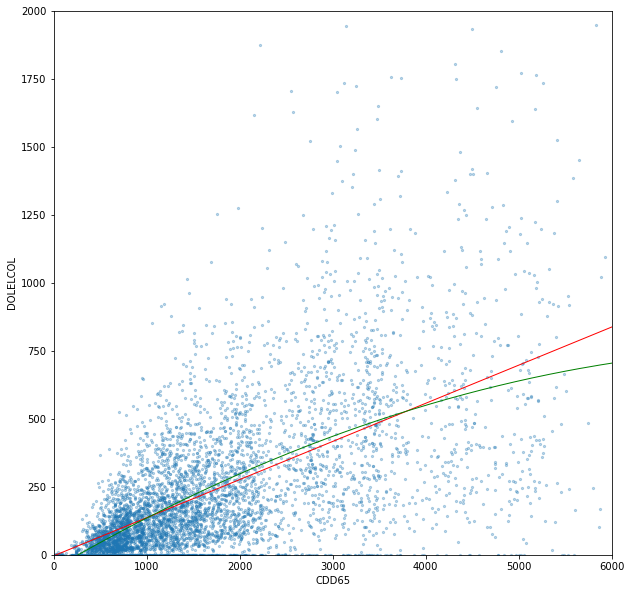

In [12]:
df_byCDD65 = df.sort_values(by='CDD65')

df_byCDD65.plot.scatter(x='CDD65', y='DOLELCOL', alpha=0.3, s=5, figsize=(10,10), marker='o')
plt.ylim((0,2000))
plt.xlim((0,6000))

plt.plot(df_byCDD65.CDD65, fit_line_lin[0] * df_byCDD65.CDD65 + fit_line_lin[1], color='red', linewidth=1)
plt.plot(df_byCDD65.CDD65, fit_line_quad[0] * df_byCDD65.CDD65**2 + fit_line_quad[1] * df_byCDD65.CDD65 + fit_line_quad[2], color='green', linewidth=1)
#plt.plot(assesed_as.FLOORAREA, fit_line_cub[0] * assesed_as.FLOORAREA**3 + fit_line_cub[1] * assesed_as.FLOORAREA**2 + fit_line_cub[2] * assesed_as.FLOORAREA + fit_line_cub[3], color='red', linewidth=2)
plt.show()

### 1.4. Data cleaning

Checking for outliers

C:\Users\javie\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


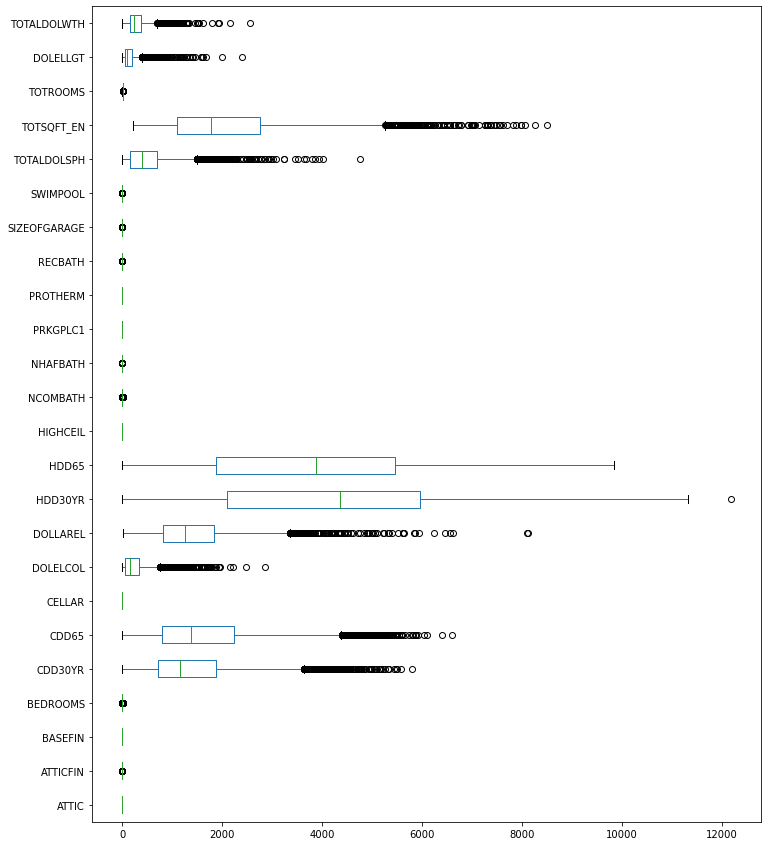

In [13]:
# Select non-categorical variables
df_numeric = df.loc[:, df.dtypes != 'object']

#Plots boxplot for all selected variables
df_numeric.boxplot(grid=False, vert=False, fontsize=10, figsize=(12,15))
plt.show()

### 1.5. Data optimization

In [14]:
# Writing df dataframe to csv

path = 'C:/Users/javie/OneDrive/Documents/springboard_projects/Capstone-2/data/processed/clean.csv'

df.to_csv(path)